This notebook describes the ```Sentiment Analysis```

**DATA:** ```Books_small.json```  

In [2]:
import json
import os

In [3]:
file = 'Books_small.json'

# open the file
f = open(file, 'r')
for line in f:
    # print first review only
    review = json.loads(line)
    print(type(review))
    for key, value in review.items():
        print(key,':',value)
    break

<class 'dict'>
reviewerID : A1E5ZR1Z4OQJG
asin : 1495329321
reviewerName : Pure Jonel "Pure Jonel"
helpful : [0, 0]
reviewText : Da Silva takes the divine by storm with this unique new novel.  She develops a world unlike any others while keeping it firmly in the real world.  This is a very well written and entertaining novel.  I was quite impressed and intrigued by the way that this solid storyline was developed, bringing the readers right into the world of the story.  I was engaged throughout and definitely enjoyed my time spent reading it.I loved the character development in this novel.  Da Silva creates a cast of high school students who actually act like high school students.  I really appreciated the fact that none of them were thrown into situations far beyond their years, nor did they deal with events as if they had decades of life experience under their belts.  It was very refreshing and added to the realism and impact of the novel.  The friendships between the characters in th

In [4]:
# we see user review in reviewText and score in overall
reviews = []
for line in f:
    review = json.loads(line)
    review_tuple = (review['reviewText'], review['overall'])
    #print(review_tuple)
    # append the tuple to reviews
    reviews.append(review_tuple)
    
print(type(reviews))
print(len(reviews))
print(reviews[0])

<class 'list'>
999
("For me personally it's the most disappointing book I have ready re: Kay Scarpetta. I generally can't put a Cornwell book down, but I had to force myself to keep reading it. Hard to stay focused when half a book describes approximately 4-6 hours.", 2.0)


In [5]:
# conver the list of tuple to Pandas DataFrame
import pandas as pd

In [6]:
# check wether we can do the above task or not
lst=[(0,2), (3,'app')]
test_df = pd.DataFrame(lst)
print(test_df)

   0    1
0  0    2
1  3  app


In [7]:
# we can do that so let's do it
df = pd.DataFrame(reviews, columns=['user_reviews', 'score'])

print(df.head())
df.describe()

                                        user_reviews  score
0  For me personally it's the most disappointing ...    2.0
1  Very simple book, but leaves you feeling good....    4.0
2  I read a library copy of this exceptionally we...    5.0
3  With the government knowing this could happen ...    5.0
4  Love the book, great story line, keeps you ent...    4.0


,score
count,999.000000
mean,4.361361
std,0.967689
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
print(type(df['score']))

<class 'pandas.core.series.Series'>


In [9]:
# we have the dataframe we can do sentiment analysis
# first let's add one more column, say 'sentiment', to df with three value POSTIVE, NEGATIVE, and NEUTRAL


sentiment = []
for score in df['score']:
    if score == 3:
        sentiment.append('NEUTRAL')
    elif score > 3:
        sentiment.append('POSITIVE')
    else:
        sentiment.append('NEGATIVE')

    # add the sentiment column
df['sentiment'] = sentiment

# let's see it
print(df.head())


                                        user_reviews  score sentiment
0  For me personally it's the most disappointing ...    2.0  NEGATIVE
1  Very simple book, but leaves you feeling good....    4.0  POSITIVE
2  I read a library copy of this exceptionally we...    5.0  POSITIVE
3  With the government knowing this could happen ...    5.0  POSITIVE
4  Love the book, great story line, keeps you ent...    4.0  POSITIVE


#### Visualization

In [10]:
# import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

5.0    609
4.0    225
3.0    103
2.0     41
1.0     21
Name: score, dtype: int64


Text(0.5, 1.0, 'Sentiment')

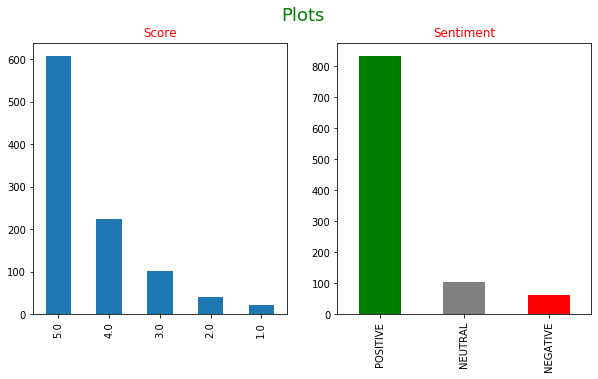

In [11]:
value_counts = df['score'].value_counts()
print(value_counts)

# plots
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5), )
fig.suptitle("Plots", fontsize = 18, color = 'green')
df['score'].value_counts().plot(kind='bar', ax = axs[0]).set_title("Score", color = 'red')
df['sentiment'].value_counts().plot(kind = 'bar', ax = axs[1], color = ['green', 'grey', 'red']).set_title("Sentiment", color = 'red')

##### WordCloud

In [12]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

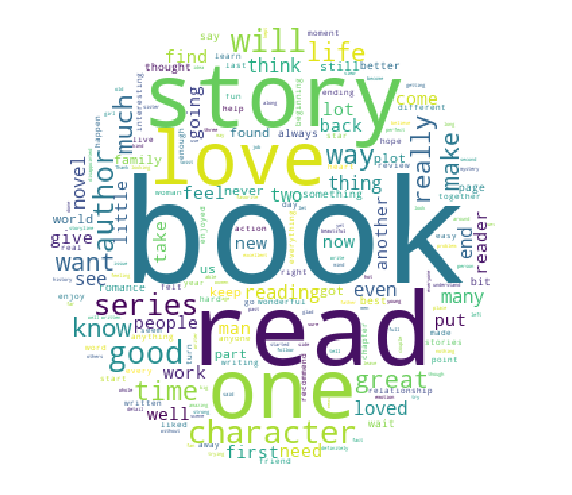

In [13]:
doc = ' '.join([sent for sent in df['user_reviews']])

mask = np.array(Image.open('circle.png'))

wc = WordCloud(background_color='white', mask = mask).generate(doc)

# plot
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Sentiment WordCloud

In [14]:
POS = df['sentiment'] == 'POSITIVE'
NEG = df['sentiment'] == 'NEGATIVE'
NEU = df['sentiment'] == 'NEUTRAL'

In [15]:
pos_doc = ' '.join([s for s in df.user_reviews[POS]])
neg_doc = ' '.join([s for s in df.user_reviews[NEG]])
neu_doc = ' '.join([s for s in df.user_reviews[NEU]])

In [16]:
mask = np.array(Image.open('circle.png'))
pos_wc = WordCloud(background_color='white', mask = mask).generate(pos_doc)
neg_wc = WordCloud(background_color='white', mask = mask).generate(neg_doc)
neu_wc = WordCloud(background_color='white', mask = mask).generate(neu_doc)

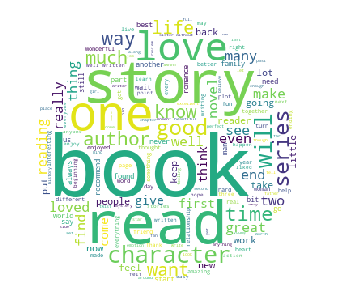

In [17]:
plt.figure(figsize=(6,6))
plt.imshow(pos_wc)

plt.axis('off')
plt.show()

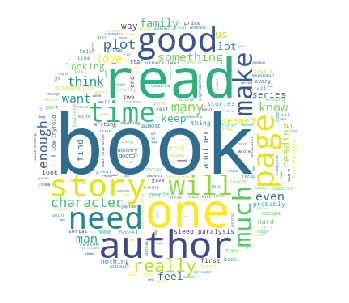

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(neg_wc)

plt.axis('off')
plt.show()

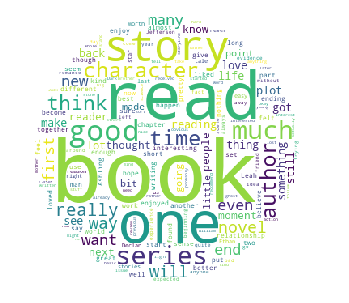

In [19]:
plt.figure(figsize=(6,6))
plt.imshow(neu_wc)
plt.axis('off')
plt.show()

#### Prepare the data
* Split the data into train, test

In [20]:
# we have uneven data distributions so let's equalize it
df['sentiment'].value_counts()

POSITIVE    834
NEUTRAL     103
NEGATIVE     62
Name: sentiment, dtype: int64

In [21]:
# we have only 62 negative reviews only
pos_reviews = df.loc[df.sentiment == 'POSITIVE', :][1:100]

In [22]:
neg_reviews = df.loc[df.sentiment == 'NEGATIVE', :]
neu_reviews = df.loc[df.sentiment == 'NEUTRAL',:]

In [23]:
new_df = pos_reviews.append(neg_reviews).append(neu_reviews)
print(new_df.shape)
print(new_df.head())

(264, 3)
                                        user_reviews  score sentiment
2  I read a library copy of this exceptionally we...    5.0  POSITIVE
3  With the government knowing this could happen ...    5.0  POSITIVE
4  Love the book, great story line, keeps you ent...    4.0  POSITIVE
5  A well written fast paced story with twists an...    5.0  POSITIVE
6  It was good....there is a lot going on with mu...    4.0  POSITIVE


In [24]:
# above is not a good way to write code
# use different method

In [25]:
# shuffle the dataframe
new_df = new_df.sample(frac=1)
print(new_df.head())

                                          user_reviews  score sentiment
48   Author had me in the first few pages, it initi...    4.0  POSITIVE
29   I read a sample and it seemed ok.  The price w...    1.0  NEGATIVE
231  The stories are interesting but they simply en...    2.0  NEGATIVE
488  I stumbled on this book in Whole Foods and was...    2.0  NEGATIVE
208  I did not get past three pages of this book be...    1.0  NEGATIVE


#### Splite the dataset

In [26]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(new_df, test_size = .3, random_state = 143)

print(training.shape)
print(test.shape)
print(training.head(2))
print(test.head(2))

(184, 3)
(80, 3)
                                          user_reviews  score sentiment
517  Nice photos and simple text though it's diffic...    3.0   NEUTRAL
678  The content is great, but the printing of the ...    2.0  NEGATIVE
                                          user_reviews  score sentiment
56   I love this story. This book is very unique an...    5.0  POSITIVE
243  Have not read it, so not sure if its good or n...    2.0  NEGATIVE


#### Feature Extraction
we have three classes pos, neg, and neutral
first convert user-reviews text to numenric by word embedding 

* CountVectorizer
* Tf-idf (Term frequency - inverse document frequency
<br/>
* word2vec
<br/>
* your own technique (if any)

### Bag of Words Vectorization

##### CountVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [28]:
vectorizer = CountVectorizer()
vectorizer.fit(training.user_reviews)
train_x_vector = vectorizer.transform(training.user_reviews)

# same for test
test_x_vector = vectorizer.transform(test.user_reviews)

print(type(train_x_vector))
print(train_x_vector[0].toarray())

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]]


### Model Implementation

#### Linear SVM

In [29]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vector, training.sentiment)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
# predict the new data
clf_svm.predict(test_x_vector[0])

array(['POSITIVE'], dtype=object)

In [31]:
prediction = clf_svm.predict(test_x_vector)
print(len(prediction))
print(prediction[0:5])
print(test.sentiment[0:5])

80
['POSITIVE' 'NEUTRAL' 'POSITIVE' 'NEGATIVE' 'POSITIVE']
56     POSITIVE
243    NEGATIVE
29     NEGATIVE
8      POSITIVE
103    POSITIVE
Name: sentiment, dtype: object


####  Look at the extracted features

In [32]:
train_x_vector

<184x3385 sparse matrix of type '<class 'numpy.int64'>'
	with 11559 stored elements in Compressed Sparse Row format>

In [33]:
# vocabulary
print("Vocabulrary:")
print(len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

Vocabulrary:
3385
{'nice': 2050, 'photos': 2228, 'and': 158, 'simple': 2726, 'text': 2997, 'though': 3030, 'it': 1616, 'difficult': 842, 'to': 3068, 'determine': 821, 'what': 3284, 'age': 116, 'group': 1332, 'is': 1610, 'being': 346, 'targeted': 2959, 'the': 3005, 'too': 3075, 'advanced': 100, 'for': 1188, 'young': 3374, 'children': 546, 'older': 2104, 'ones': 2111, 'content': 663, 'great': 1320, 'but': 467, 'printing': 2325, 'of': 2091, 'book': 402, 'terrible': 2995, 'looks': 1812, 'like': 1769, 'photocopied': 2227, 'version': 3212, 'real': 2424, 'this': 3025, 'price': 2322, 'was': 3255, 'hoping': 1465, 'better': 368, 'print': 2324, 'quality': 2383, 'don': 878, 'know': 1701, 'expecting': 1043, 'wasn': 3257, 'about': 46, 'multiple': 1991, 'affairs': 106, 'drug': 901, 'use': 3191, 'lots': 1823, 'words': 3339, 'have': 1380, 'always': 142, 'admired': 92, 'her': 1417, 'talent': 2950, 'now': 2076, 'think': 3021, 'she': 2702, 'would': 3349, 'wise': 3316, 'been': 333, 'more': 1973, 'prudent':

In [41]:
features = vectorizer.get_feature_names()
print(type(features))
print(len(features))
print(features)

<class 'list'>
3385
['000', '10', '12', '13', '14', '15', '1930', '1still', '1this', '20', '2008', '2014', '2016', '23', '2nd', '30', '34', '360', '3books', '3part', '3rd', '40', '4555', '47', '50', '500', '52', '5433', '5th', '60', '80', '8211', '8216', '8217', '8220', '8221', '8230', '83', '90', '978', '99', 'aback', 'abby', 'abilities', 'able', 'abound', 'about', 'above', 'absolutely', 'absurd', 'abundance', 'abuse', 'abusive', 'academic', 'academics', 'acceleration', 'accent', 'accept', 'acceptable', 'acceptance', 'accepting', 'accidental', 'accidents', 'accomplish', 'according', 'account', 'accountant', 'accounts', 'accumulates', 'accused', 'accuses', 'achieve', 'achieved', 'achievement', 'acquisition', 'across', 'acted', 'action', 'actions', 'activate', 'activated', 'actor', 'actress', 'actual', 'actuality', 'actually', 'add', 'addition', 'address', 'addressing', 'adds', 'admire', 'admired', 'admission', 'admitted', 'adolescent', 'adored', 'adrian', 'adults', 'advance', 'advanced